In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Data/properatti.csv")
#df.head()

Me quedo solo con los registros completos de este dataframe

In [5]:
#COMPLETAR para calcular df_completes
df_completes = df.dropna()

In [6]:
df_completes.shape

(598, 26)

Veo qué variables tengo en el dataframe y de que tipo son:

In [8]:
#COMPLETAR PARA OBTENER ESTA SALIDA
df_completes.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [10]:
#COMPLETAR PARA OBTENER ESTA SALIDA (tipos de cada una de las variables del dataframe)
df_completes.dtypes


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

Bokeh

In [11]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot

output_notebook()

Loading BokehJS ...

Defino estilos que voy a reusar en varios gráficos de Bokeh:

In [12]:
options = {'plot_width': 450,
           'plot_height': 450,
           'tools': 'pan, wheel_zoom, box_zoom, box_select, lasso_select, reset'}

options_circle = {'size': 7, 
                  'color': "firebrick", 
                  'alpha': 0.5}

Veo cómo se relacionan las variables surface_total_in_m2 y surface_covered_in_m2 usando un scatter plot (circle)

In [13]:
x = df_completes.surface_total_in_m2
y = df_completes.surface_covered_in_m2

#COMPLETAR PARA OBTENER ESTE GRAFICO
r= figure(width=500,height=500)
r.circle(x,y,sie=7,color="firebrick",alpha=5)



AttributeError: unexpected attribute 'sie' to Circle, similar attributes are size

Veo cómo se relacionan las variables surface_total_in_m2 y price

In [27]:
x = df_completes.surface_total_in_m2
y = df_completes.price

#COMPLETAR PARA OBTENER ESTE GRAFICO



Quiero ver la relación anterior para valores de surface_total_in_m2 < 200 y price <  8E5   

In [28]:



#COMPLETAR PARA OBTENER EL DATAFRAME QUE CUMPLE LAS CONDICIONES DE ARRIBA, EL RESULTADO SE GUARDA ENLA VARIABLE df_completes_l200




df_completes_l200.shape


(586, 26)

In [29]:
x = df_completes_l200.surface_total_in_m2
y = df_completes_l200.price

#COMPLETAR PARA OBTENER ESTE GRAFICO




Armo una grilla con esos graficos

In [30]:

#COMPLETAR PARA OBTENER ESTE GRAFICO (ARMAR LA GRILLA UBICANDO LOS GRAFICOS CREADOS EN LOS PASOS ANTERIORES)


show(grid)

# Plotly

In [14]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, plot

In [15]:
usuario = 'darosk88' # usuario
key_api = 'IwJDuVuB7d5zNGKw0zxJ' # key_api
plotly.tools.set_credentials_file(username = usuario, api_key = key_api)

Elijo una variable categórica para graficar: state_name. Cuento cuantas propiedades publicadas hay por estado

In [16]:
#x_data = df_completes.property_type.unique()
#x_data = df_completes.place_name.unique()
x_data = df_completes.state_name.unique()
print(x_data)

['Buenos Aires Costa Atlántica' 'Capital Federal'
 'Bs.As. G.B.A. Zona Oeste' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Sur' 'Río Negro' 'Córdoba']


In [31]:
#groupby
df_grouped_state = df_completes.groupby('state_name')
df_grouped_count = df_grouped_state.agg({"operation": "count"})
df_grouped_count = df_grouped_count.rename(index=str, columns={"operation": "cantidad"}) #renombro la columna por cantidad


Index(['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica',
       'Capital Federal', 'Córdoba', 'Río Negro'],
      dtype='object', name='state_name')

In [32]:
y_data = df_grouped_count.cantidad
x_data = df_grouped_count.index
market_share_perc = 100* y_data / sum(y_data)
market_share_perc = np.round(market_share_perc, 2)
print(market_share_perc)

plot_text = [str(x) +' % market share' for x in market_share_perc]
plot_text

state_name
Bs.As. G.B.A. Zona Norte         3.34
Bs.As. G.B.A. Zona Oeste        12.54
Bs.As. G.B.A. Zona Sur           1.67
Buenos Aires Costa Atlántica     5.52
Capital Federal                 76.42
Córdoba                          0.33
Río Negro                        0.17
Name: cantidad, dtype: float64


['3.34 % market share',
 '12.54 % market share',
 '1.67 % market share',
 '5.52 % market share',
 '76.42 % market share',
 '0.33 % market share',
 '0.17 % market share']

In [33]:
trace0 = go.Bar(x = x_data,
                y= y_data,
                text=plot_text,
                marker=dict(color=['rgb(158,202,225)','rgb(111,202,135)', 'rgb(158,60,225)', \
                                  'rgb(158,202,225)','rgb(111,202,135)', 'rgb(158,60,225)', \
                                  'rgb(158,202,225)'],
                            line=dict(color='rgb(8,48,107)',
                                      width=1.5)),
                opacity=0.6)

data = [trace0]
layout = go.Layout(title='Cantidad de propiedades por estado (solo registros completos)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~darosk88/0 or inside your plot.ly account where it is named 'text-hover-bar'


# Geopandas

In [34]:
%matplotlib inline

import pandas as pd
import geopandas
import fiona
import rtree
import folium

# Setteo el tamaño default de los plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 5)

pd.options.display.max_rows = 10

Grafico las propiedades de los registros completos del dataframe en los barrios definidos en el dataframe barrios

In [35]:
barrios = pd.read_csv("Data/barrios.csv", encoding='latin1')
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [52]:
import shapely.wkt #Para explorar un poco el DataFrame

def from_wkt(df, wkt_column):
#     import shapely.wkt
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(df, geometry='coordinates')
    return gdf

barrios_geo = from_wkt(barrios, "WKT")

In [36]:
df_completes['lat-lon']
df_completes['lat']
df_completes['lon']

96       -56.677483
691      -58.472006
692      -58.472006
693      -58.472129
694      -58.471989
            ...    
113200   -58.442528
113201   -58.384326
116148   -58.403646
117105   -58.400427
119551   -58.557932
Name: lon, Length: 598, dtype: float64

In [44]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

def from_x_y(df, x, y):
    gdf = geopandas.GeoDataFrame(df.drop([x, y], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

In [46]:
df_completes_CABA = df_completes[df_completes.state_name == 'Capital Federal']
df_completes_CABA.columns
#COMPLETAR PARA CREAR EL GeoDataFrame PROPIEDADES
propiedades = from_x_y(df_completes_CABA,"lon","lat")

NameError: name 'barrios_geo' is not defined

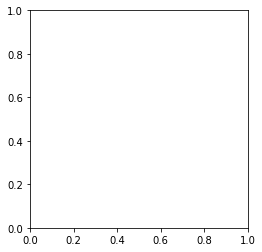

In [47]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
barrios_geo.plot(ax=ax, color='white', edgecolor='black')
propiedades.plot(ax=ax, marker='o', color='red', markersize=25)
plt.show();

# Cómo liberar memoria

In [18]:
dataframe_to_delete = pd.DataFrame()
print(dataframe_to_delete)

del dataframe_to_delete
#print(dataframe_to_delete)

import gc
gc.collect()
# The number of unreachable objects found is returned.
# It's really the sum of two numbers: the number of objects that were identified as garbage and actually freed, 
# plus the number of objects that were identified as garbage but could not be freed

Empty DataFrame
Columns: []
Index: []


245